In [95]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import seaborn as sns
from statistics import mean

from scipy.optimize import curve_fit

In [59]:
# load data
with open("../Data/Initial_pScreen_testing.xlsx", 'rb') as f:
    data = pd.read_excel(f)

# Get labels (doesn't change order)
names = data["Name"]
l = [i[:-2] for i in list(names)]

# ligand concentrations
x_conc = [int(i) for i in list(dict.fromkeys(l))]
print(x_conc)

# values to plot
yR = data["RFU/OD_R2.1"]
yS = data["RFU/OD_S3"]

#process data via a dictionary
data_dict = {}
for i in range(0,len(names)):
    l = names[i][:-2]
    if l not in data_dict:
        data_dict[l] = {"GFP": [yS[i]], "RFP": [yR[i]]}
    else:
        data_dict[l]["GFP"].append(yS[i])
        data_dict[l]["RFP"].append(yR[i])
#calculate averages
for i in data_dict.keys():
    data_dict[i]["avgGFP"] = mean(data_dict[i]["GFP"])
    data_dict[i]["avgRFP"] = mean(data_dict[i]["RFP"])

# print(data_dict)

y = []
for i in data_dict:
    y.append(float(data_dict[i]["avgGFP"]))
points = []
for i in data_dict:
    points.append(data_dict[i]["GFP"])

print(points)



[0, 5, 10, 25, 50, 100, 250, 500]
[[np.float64(14440.89457), np.float64(14160.19417), np.float64(14813.44538)], [np.float64(28161.67665), np.float64(28338.95706), np.float64(28316.74959)], [np.float64(49096.2406), np.float64(48919.50464), np.float64(47338.73582)], [np.float64(130667.6783), np.float64(126114.1975), np.float64(125327.6398)], [np.float64(281299.8454), np.float64(273589.7436), np.float64(269802.2152)], [np.float64(527921.7527), np.float64(522833.0684), np.float64(530702.9221)], [np.float64(849068.5155), np.float64(861996.6499), np.float64(860821.5488)], [np.float64(972746.5517), np.float64(973033.6879), np.float64(984855.0984)]]


(200, 10, 10, 0.1)


/var/folders/s4/1zbdf0sn3nz0djbwvkr5q_km0000gn/T/ipykernel_17075/2841441297.py:27: RuntimeWarning: divide by zero encountered in power
  return d + (a-d) * np.power(x,b) / (np.power(c,b) + np.power(x,b))
/var/folders/s4/1zbdf0sn3nz0djbwvkr5q_km0000gn/T/ipykernel_17075/2841441297.py:27: RuntimeWarning: invalid value encountered in power
  return d + (a-d) * np.power(x,b) / (np.power(c,b) + np.power(x,b))
/var/folders/s4/1zbdf0sn3nz0djbwvkr5q_km0000gn/T/ipykernel_17075/2841441297.py:27: RuntimeWarning: invalid value encountered in divide
  return d + (a-d) * np.power(x,b) / (np.power(c,b) + np.power(x,b))


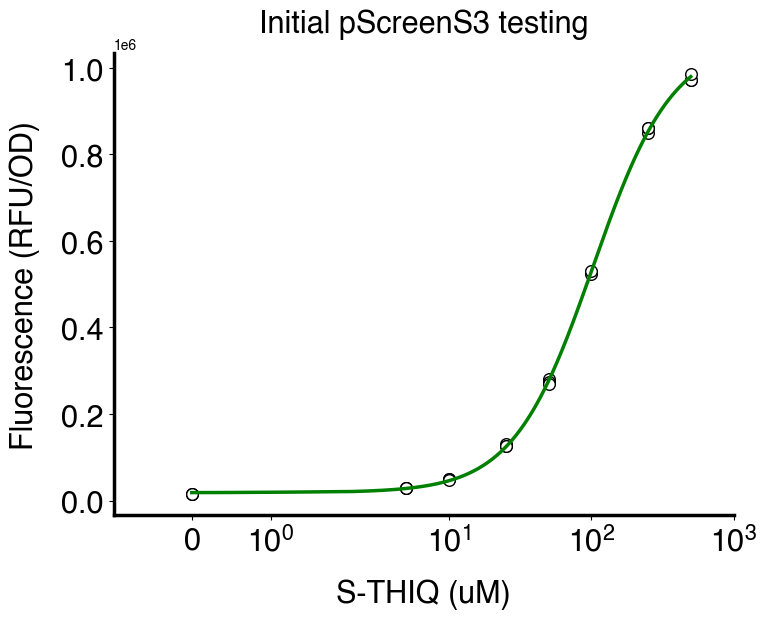

saved figure to ../SVG/Initial_pScreenS3_testing.svg


In [90]:
#create plots
fig, ax = plt.subplots(figsize=(8, 6))
ax.spines['bottom'].set_linewidth(2.5)
ax.spines['left'].set_linewidth(2.5)

# define hill function
def hill_funct(x, low, high, mid, n):
    return low + (high-low)*( x**n )/( mid**n + x**n )

# set figure size
plt.rcParams["figure.figsize"] = [6, 4]
# Set Helvetica as the default font
mpl.rcParams['font.family'] = 'Helvetica'

# create xaxis for curvefit
xaxis_max = 1000
x = np.linspace(1e-8,(xaxis_max/2),100000)

# define initial parameters. THIS IS ALWAYS TRIAL AND ERROR!
median_x = np.median(x)
half_y = float(max(y))/2
initParam = (200, 10, 10, 0.1)
print(initParam)

    #Hill sigmoid function
def sigmoid(x, a, b, c, d):
        return d + (a-d) * np.power(x,b) / (np.power(c,b) + np.power(x,b))

# plot line
popt, pcov = curve_fit(sigmoid, x_conc, y, initParam, maxfev=1000)
plt.plot(x, sigmoid(x, *popt), label='fit', lw=2.5, color="green")

# plot individual points
for i in range(0, len(x_conc)):
    for k in points[i]:
        plt.scatter(x_conc[i],k, s=70, color="white", edgecolor="black")

# set plot style
plt.title("Initial pScreenS3 testing", fontsize=22, pad=15)
plt.xlabel("S-THIQ (uM)", fontsize=22, labelpad=15)
plt.ylabel("Fluorescence (RFU/OD)", fontsize=22, labelpad=15)
plt.yticks(size=22)
plt.xticks(size=22)
ax.set_xscale("symlog")
ax.set_xlim(-0.99,1000)
# Remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

save_name = "../SVG/Initial_pScreenS3_testing.svg"
plt.savefig(save_name, format="svg")
plt.show()
print("saved figure to "+ save_name)


[[np.float64(5824.074074), np.float64(5613.598673), np.float64(4288.109756)], [np.float64(7739.568345), np.float64(5288.590604), np.float64(7308.362369)], [np.float64(9749.539595), np.float64(6644.245142), np.float64(9078.055965)], [np.float64(9457.902511), np.float64(13199.1018), np.float64(14166.17647)], [np.float64(18525.0), np.float64(19436.24161), np.float64(18289.15663)], [np.float64(24230.99851), np.float64(28681.2749), np.float64(24062.78714)], [np.float64(32971.47385), np.float64(35532.05128), np.float64(33761.4534)], [np.float64(44721.70686), np.float64(40187.39635), np.float64(39477.12418)]]
(200, 10, 10, 0.1)


/var/folders/s4/1zbdf0sn3nz0djbwvkr5q_km0000gn/T/ipykernel_17075/2841441297.py:27: RuntimeWarning: divide by zero encountered in power
  return d + (a-d) * np.power(x,b) / (np.power(c,b) + np.power(x,b))
/var/folders/s4/1zbdf0sn3nz0djbwvkr5q_km0000gn/T/ipykernel_17075/2841441297.py:27: RuntimeWarning: invalid value encountered in divide
  return d + (a-d) * np.power(x,b) / (np.power(c,b) + np.power(x,b))
/var/folders/s4/1zbdf0sn3nz0djbwvkr5q_km0000gn/T/ipykernel_17075/2841441297.py:27: RuntimeWarning: invalid value encountered in power
  return d + (a-d) * np.power(x,b) / (np.power(c,b) + np.power(x,b))
/var/folders/s4/1zbdf0sn3nz0djbwvkr5q_km0000gn/T/ipykernel_17075/2841441297.py:27: RuntimeWarning: overflow encountered in power
  return d + (a-d) * np.power(x,b) / (np.power(c,b) + np.power(x,b))


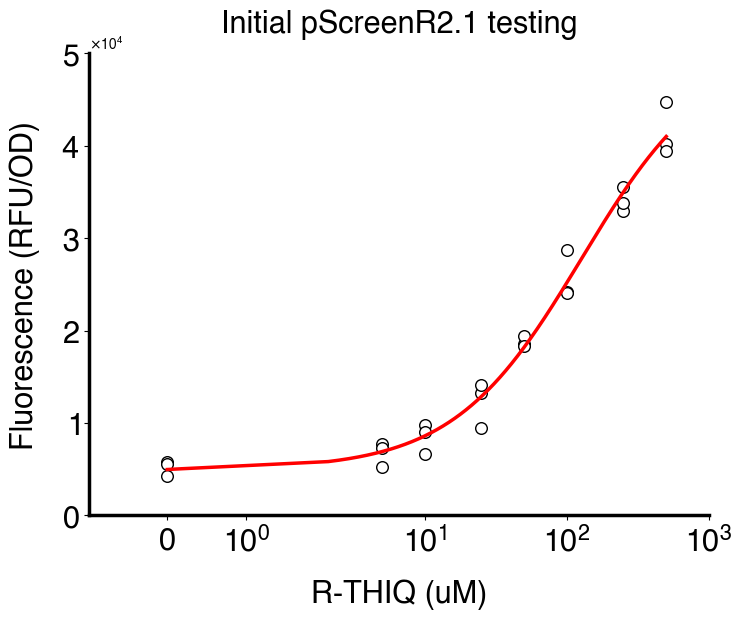

saved figure to ../SVG/Initial_pScreenR2.1_testing.svg


In [97]:
# collect pScreenR2.1 data
y = []
for i in data_dict:
    y.append(float(data_dict[i]["avgRFP"]))
points = []
for i in data_dict:
    points.append(data_dict[i]["RFP"])

print(points)


#create plots
fig, ax = plt.subplots(figsize=(8, 6))
ax.spines['bottom'].set_linewidth(2.5)
ax.spines['left'].set_linewidth(2.5)


# define initial parameters. THIS IS ALWAYS TRIAL AND ERROR!
median_x = np.median(x)
half_y = float(max(y))/2
initParam = (200, 10, 10, 0.1)
print(initParam)


# plot line
popt, pcov = curve_fit(sigmoid, x_conc, y, initParam, maxfev=1000)
plt.plot(x, sigmoid(x, *popt), label='fit', lw=2.5, color="red")

# plot individual points
for i in range(0, len(x_conc)):
    for k in points[i]:
        plt.scatter(x_conc[i],k, s=70, color="white", edgecolor="black")

# set plot style
plt.title("Initial pScreenR2.1 testing", fontsize=22, pad=15)
plt.xlabel("R-THIQ (uM)", fontsize=22, labelpad=15)
plt.ylabel("Fluorescence (RFU/OD)", fontsize=22, labelpad=15)
plt.yticks(size=22)
plt.xticks(size=22)
ax.set_xscale("symlog")
ax.set_xlim(-0.99,1000)
ax.set_ylim(0,50000)
# Remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# Setting y-axis to scientific notation
ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

save_name = "../SVG/Initial_pScreenR2.1_testing.svg"
plt.savefig(save_name, format="svg")
plt.show()
print("saved figure to "+ save_name)
